In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4525,6578-KRMAW,Male,0,No,No,32,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),93.40,2979.3,No
1407,0895-UADGO,Male,0,No,Yes,8,No,No phone service,DSL,Yes,...,No,Yes,No,Yes,Two year,Yes,Mailed check,44.55,343.45,No
5937,5383-MMTWC,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.00,613.4,Yes
1772,7198-GLXTC,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,79.00,143.65,Yes
4963,8313-AFGBW,Male,0,Yes,No,47,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,No,Electronic check,73.60,3522.65,No


In [3]:
df.drop(columns='customerID', inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [7]:
df.isna().mean()*100

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [8]:
from sklearn.impute import KNNImputer
imp = KNNImputer()
numDF = df.select_dtypes(include='number')
df.loc[:,numDF.columns] = imp.fit_transform(numDF)

In [9]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
996,Female,0,No,No,34,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),70.00,2416.10,Yes
1123,Male,0,Yes,Yes,25,Yes,No,DSL,Yes,Yes,Yes,No,No,No,One year,Yes,Bank transfer (automatic),61.60,1611.00,No
2770,Male,0,Yes,Yes,17,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.55,1515.10,Yes
631,Female,0,Yes,No,46,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),55.00,2473.95,No
1559,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,45.30,No


In [10]:
objColums = df.select_dtypes(exclude=['number'])
objColums.drop(columns='Churn')
for col in objColums.columns:
    print(f"For column {col} ",df[col].unique(),"\n")

For column gender  ['Female' 'Male'] 

For column Partner  ['Yes' 'No'] 

For column Dependents  ['No' 'Yes'] 

For column PhoneService  ['No' 'Yes'] 

For column MultipleLines  ['No phone service' 'No' 'Yes'] 

For column InternetService  ['DSL' 'Fiber optic' 'No'] 

For column OnlineSecurity  ['No' 'Yes' 'No internet service'] 

For column OnlineBackup  ['Yes' 'No' 'No internet service'] 

For column DeviceProtection  ['No' 'Yes' 'No internet service'] 

For column TechSupport  ['No' 'Yes' 'No internet service'] 

For column StreamingTV  ['No' 'Yes' 'No internet service'] 

For column StreamingMovies  ['No' 'Yes' 'No internet service'] 

For column Contract  ['Month-to-month' 'One year' 'Two year'] 

For column PaperlessBilling  ['Yes' 'No'] 

For column PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

For column Churn  ['No' 'Yes'] 



In [11]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


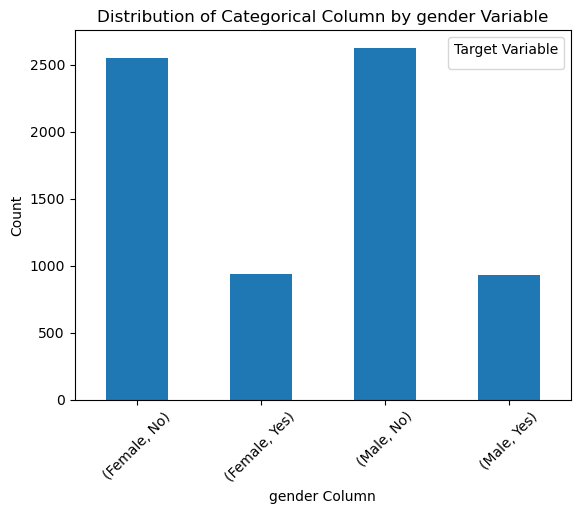

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


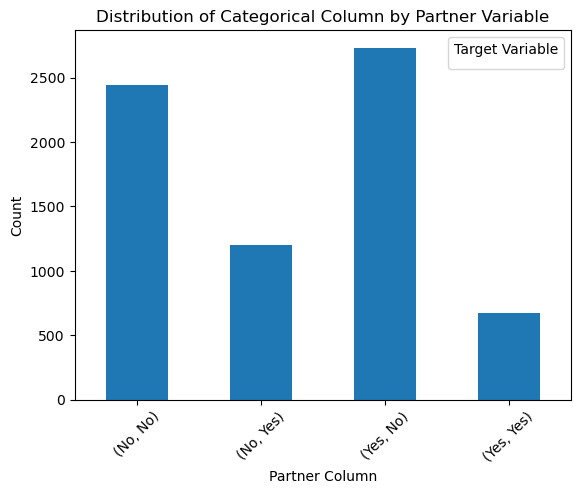

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


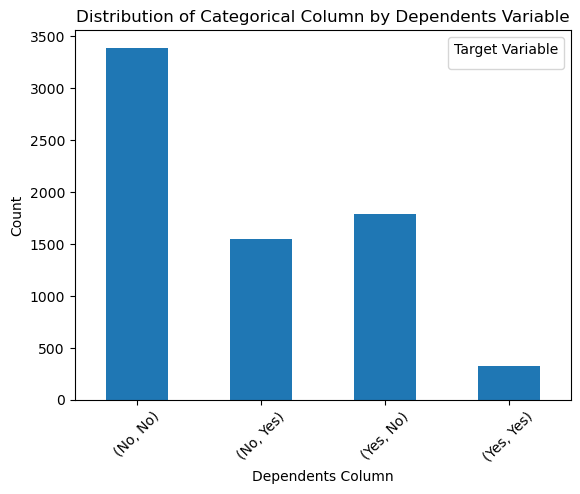

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


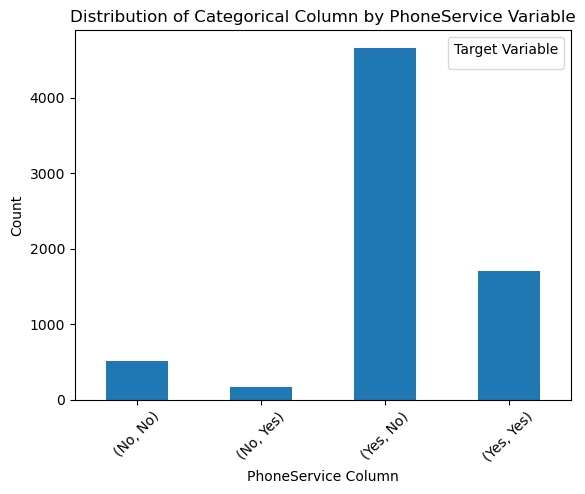

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


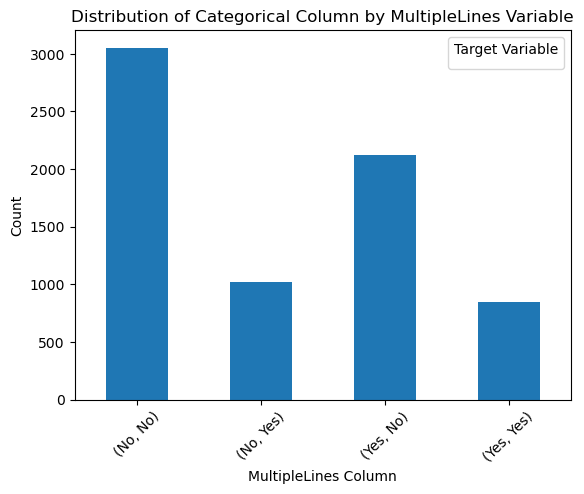

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


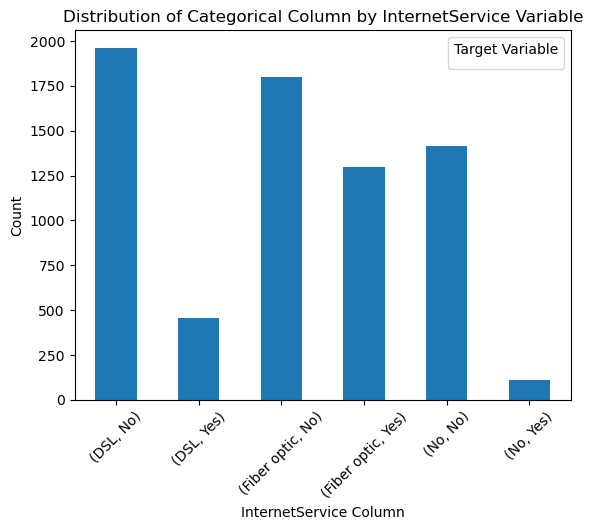

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


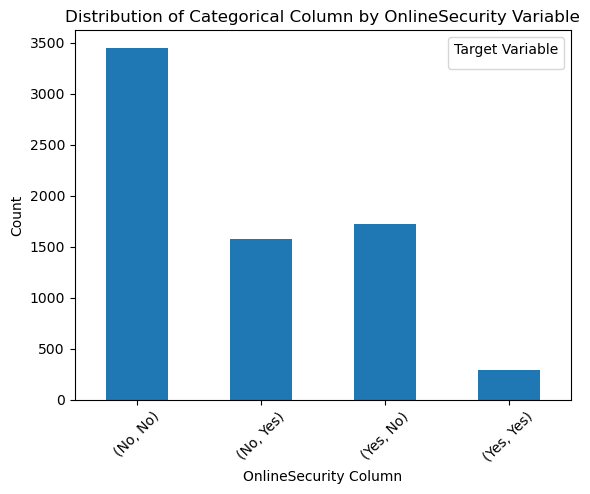

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


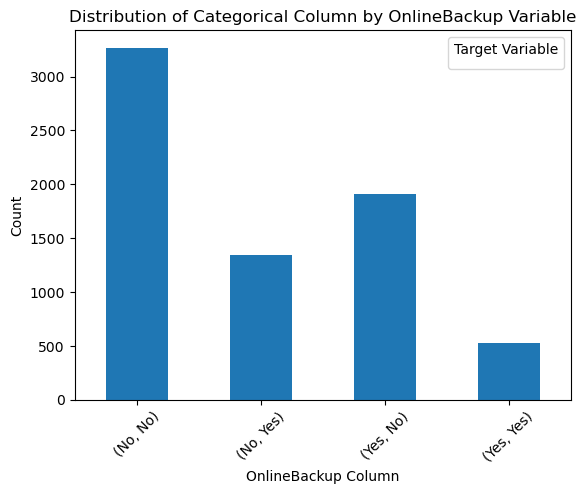

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


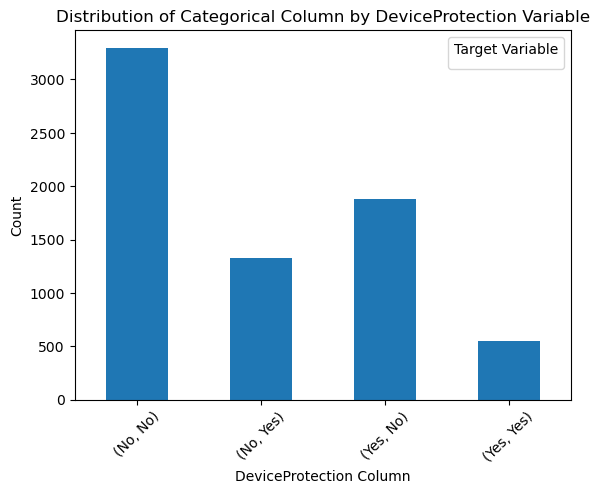

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


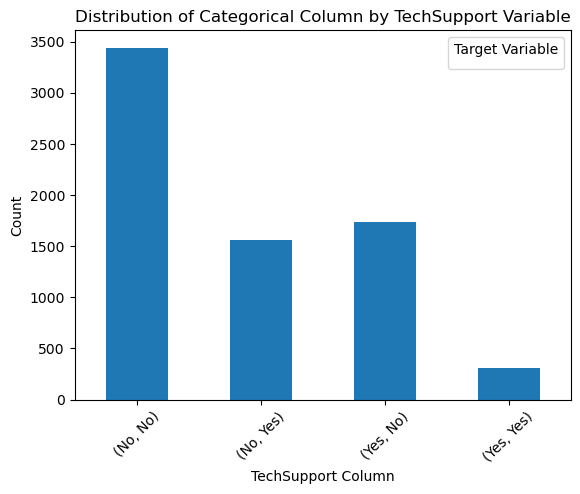

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


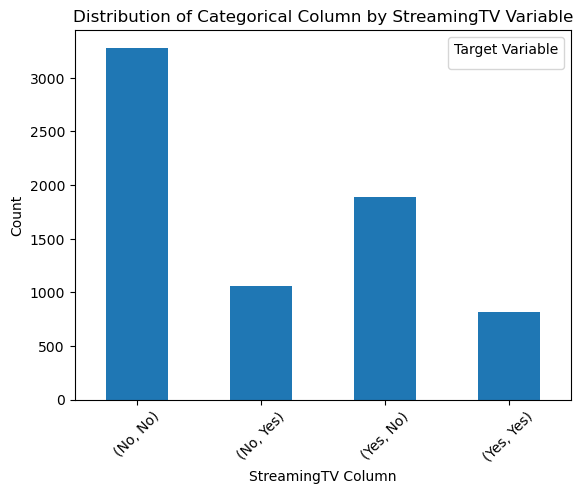

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


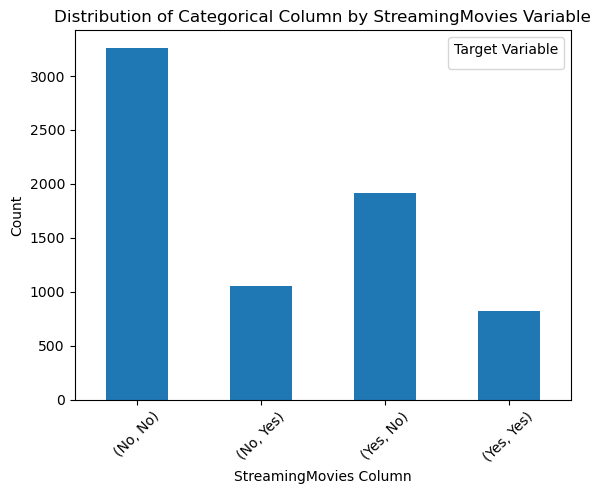

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


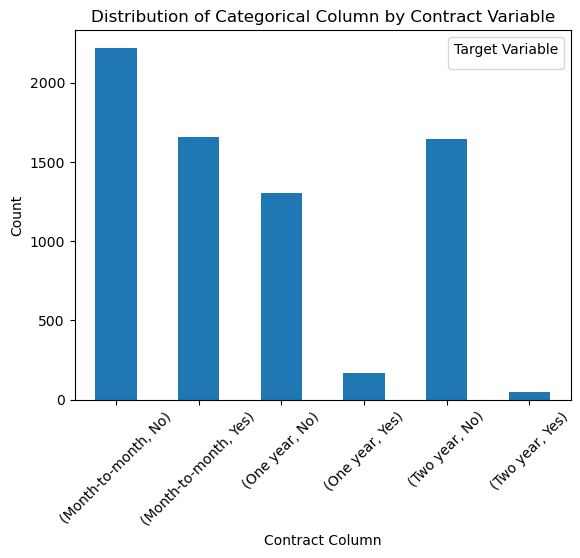

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


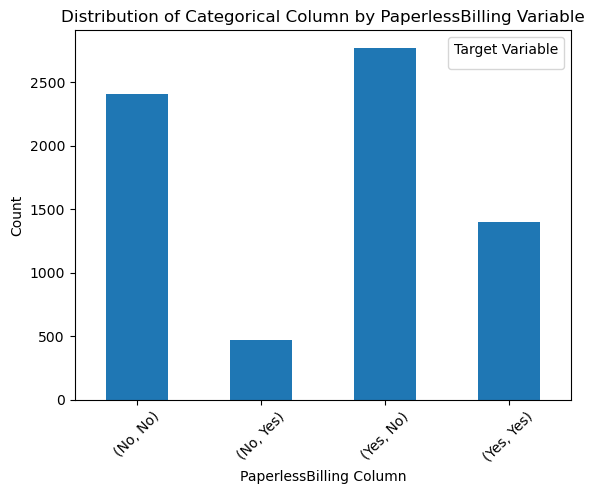

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


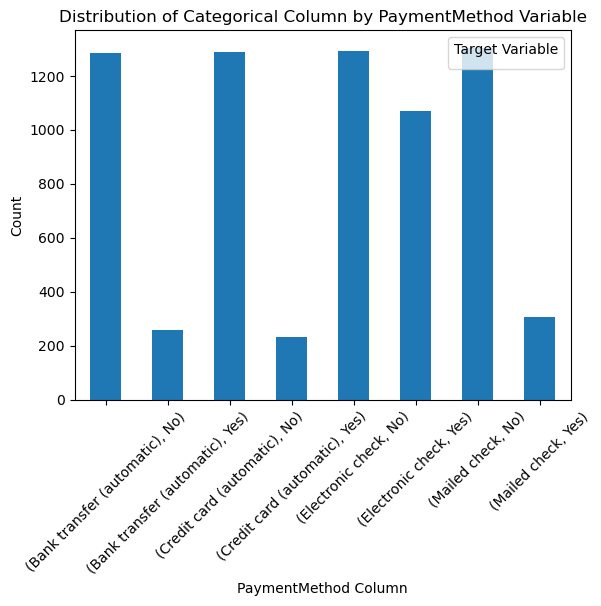

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


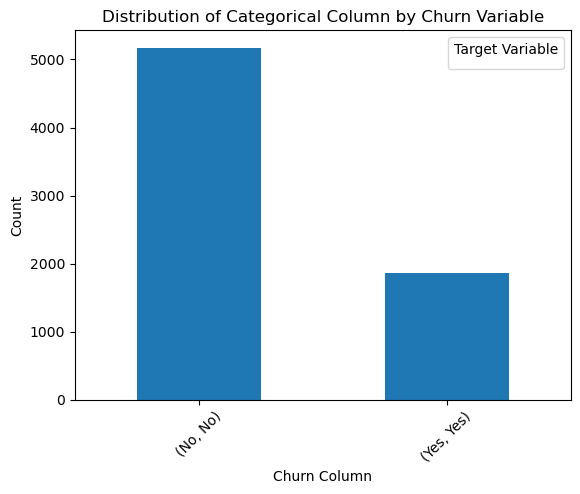

In [13]:
for col in objColums:
    grouped = df.groupby([col, 'Churn']).size().unstack()

    # Plot the grouped data
    grouped.plot(kind='bar', stacked=True)

    # Customize the plot
    plt.title('Distribution of Categorical Column by {} Variable'.format(col))
    plt.xlabel('{} Column'.format(col))
    plt.ylabel('Count')
    plt.xticks(rotation = 45)  # Rotate x-axis labels if needed
    plt.legend(title='Target Variable')

    # Show the plot
    plt.show()


In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

In [15]:
objColums

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [16]:
X_new = ohe.fit_transform(objColums).toarray()
newMat = pd.DataFrame(X_new,columns=ohe.get_feature_names_out(objColums.columns))
newMat

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [17]:
order = {'No': 0, 'Yes': 1}
df['Churn'] = df['Churn'].map(order)

In [18]:
df.drop(columns=objColums.columns,inplace=True)
df = pd.concat([df,newMat],axis=1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df.loc[:,:] = ms.fit_transform(df)

In [20]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,0.472222,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.027778,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.027778,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.227521,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0,1.000000,0.845274,0.847461,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0,0.152778,0.112935,0.037809,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1,0.055556,0.558706,0.033210,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [21]:
x = df.drop('Churn_Yes',axis=1)
y = df['Churn_Yes']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
shap = len(x_train.columns)
shap

30

In [29]:
model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
177/177 [==============================] - 1s 2ms/step - loss: 0.4871 - accuracy: 0.7602
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7968
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8016
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8032
Epoch 5/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.8060
Epoch 6/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8083
Epoch 7/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8078
Epoch 8/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8104
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8094
Epoch 10/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4058 - accura

177/177 [==============================] - 1s 3ms/step - loss: 0.3499 - accuracy: 0.8410
Epoch 82/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8390
Epoch 83/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8399
Epoch 84/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8404
Epoch 85/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8395
Epoch 86/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8427
Epoch 87/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8381
Epoch 88/100
177/177 [==============================] - 1s 4ms/step - loss: 0.3467 - accuracy: 0.8397
Epoch 89/100
177/177 [==============================] - 1s 3ms/step - loss: 0.3437 - accuracy: 0.8435
Epoch 90/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 

In [30]:
model.evaluate(x_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7892


[0.47811979055404663, 0.7892122268676758]

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lrPredicted = lr.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,f1_score
cm1 = confusion_matrix(y_test, lrPredicted)
print("The confusion matrix for logistic regression is: \n",cm1)
print("The accuracy of logistic regression is ",accuracy_score(y_test, lrPredicted)*100,"%")

The confusion matrix for logistic regression is: 
 [[914 109]
 [183 203]]
The accuracy of logistic regression is  79.27608232789211 %


In [33]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth=8, min_samples_split=5)
classifierRF.fit(x_train, y_train)
RFpredict = classifierRF.predict(x_test)

In [34]:
cm2 = confusion_matrix(y_test, RFpredict)
print("The confusion matrix for random forest  is: \n",cm1)
print("The accuracy of RF is ",accuracy_score(y_test, RFpredict)*100,"%")

The confusion matrix for random forest  is: 
 [[914 109]
 [183 203]]
The accuracy of RF is  79.4889992902768 %


In [35]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
xgPred = xgb.predict(x_test)
cm3 = confusion_matrix(y_test, xgPred)
print("The confusion matrix for xgb is: \n",cm3)
print("The accuracy of xgb is ",accuracy_score(y_test, xgPred)*100,"%")

The confusion matrix for xgb is: 
 [[913 110]
 [195 191]]
The accuracy of xgb is  78.35344215755855 %
